In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from web_scraping import filter_df

### Importa risultati

Importiamo i dati salvati in `results/bond_info_extracted.csv`, dove sono contenuti anche i volumi mensili di acquisto (mediani, minimo e massimo).

In [11]:
df_results = pd.read_csv('results/bond_info_extracted.csv', index_col=0)

df_results.head()

,Numero Contratti,Volume Ultimo,Volume totale,Prezzo ufficiale,Rendimento effettivo a scadenza netto,Rendimento effettivo a scadenza lordo,Duration modificata,Scadenza,anni_scadenza,median_monthly_volume_million,min_monthly_volume_million,max_monthly_volume_million,ratings
AT0000A27LQ1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0.00,0.0,0.0,0.0,0
AT0000A2NW83,1.0,45000.0,45000.0,85.0,2.77,2.77,5.76,20/02/31,5.92,0.0,0.0,0.0,0
AT0000A3FA05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0.00,0.0,0.0,0.0,0
BE6276040431,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0.00,0.0,0.0,0.0,0
BE6282460615,0.0,0.0,0.0,99.9,2.00,2.72,2.54,02/12/27,1.90,0.0,0.0,0.0,0


### Distribuzione dei volumi medi mensili

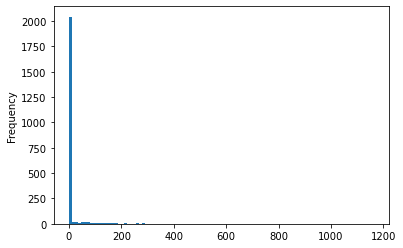

In [12]:
(df_results['median_monthly_volume_million']).plot(kind='hist', bins=100)
plt.show()

### Filtra dataframe 
A titolo di esempio, filtriamo i bond:
- con scadenza compresa tra 2 e 7 anni
- con prezzo inferiore a 100
- escludiamo BTP e titoli della Romania

Ordiniamo il risultato per volume mediano mensile (in ordine decrescente come opzione di default). 

In [19]:
sub_df = filter_df(df_results,
                   anni_scadenza_min=2,
                   anni_scadenza_max=7,
                   prezzo_max=100,
                   ncontratti_min=0,
                   sort_by = "median_monthly_volume_million",
                   escludi_BTP=True,
                   escludi_romania=True)

In [18]:
sub_df.head(20)

,Numero Contratti,Volume Ultimo,Volume totale,Prezzo ufficiale,Rendimento effettivo a scadenza netto,Rendimento effettivo a scadenza lordo,Duration modificata,Scadenza,anni_scadenza,median_monthly_volume_million,min_monthly_volume_million,max_monthly_volume_million,ratings
IT0005619546,125.0,1000.0,3545000.0,98.71355,3.00,3.41,5.79,15/11/31,6.65,203.99,45.42,458.90,98
IT0005494239,92.0,2000.0,4933000.0,93.57510,3.15,3.51,6.73,01/12/32,6.81,174.85,92.52,259.28,98
IT0005497000,183.0,200000.0,5348000.0,99.71788,2.78,3.19,3.53,28/06/30,5.27,93.89,57.22,169.90,94
IT0005466013,62.0,160000.0,3768000.0,84.55373,3.29,3.43,6.69,01/06/32,6.80,88.35,64.27,130.40,93
IT0005094088,63.0,110000.0,6912000.0,89.56843,3.17,3.39,6.34,01/03/32,6.79,71.47,51.31,128.92,92
IT0005436693,83.0,7000.0,2954000.0,84.85664,3.20,3.28,6.03,01/08/31,5.80,70.73,58.14,137.40,92
IT0005449969,43.0,10000.0,1371000.0,85.86671,3.23,3.36,6.25,01/12/31,5.81,54.96,29.42,84.48,90
IT0005415291,84.0,50000.0,1222000.0,91.29211,3.04,3.22,4.96,14/07/30,5.32,53.07,38.59,65.16,89
IT0005422891,41.0,10000.0,2488000.0,87.45359,3.14,3.26,5.65,01/04/31,5.79,47.75,35.63,73.04,89
IT0005387052,4.0,109000.0,223000.0,96.22889,2.73,3.46,3.69,15/05/30,5.15,17.24,8.61,53.00,85
